In [0]:
import numpy as np
import cv2
import os
from skimage import io
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from skimage import io

In [2]:
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.layers.normalization import BatchNormalization

Using TensorFlow backend.


In [4]:

!wget https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml

--2018-03-26 11:16:32--  https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 930127 (908K) [text/plain]
Saving to: ‘haarcascade_frontalface_default.xml’

haarcascade_frontal 100%[===================>] 908.33K  --.-KB/s    in 0.07s   

2018-03-26 11:16:33 (12.3 MB/s) - ‘haarcascade_frontalface_default.xml’ saved [930127/930127]



In [14]:
!wget https://data.vision.ee.ethz.ch/cvl/rrothe/imdb-wiki/static/wiki_crop.tar

--2018-03-26 11:22:34--  https://data.vision.ee.ethz.ch/cvl/rrothe/imdb-wiki/static/wiki_crop.tar
Resolving data.vision.ee.ethz.ch (data.vision.ee.ethz.ch)... 129.132.52.162
Connecting to data.vision.ee.ethz.ch (data.vision.ee.ethz.ch)|129.132.52.162|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 811315200 (774M) [application/x-tar]
Saving to: ‘wiki_crop.tar’

wiki_crop.tar         3%[                    ]  27.98M   671KB/s    eta 19m 8s 

wiki_crop.tar        99%[==================> ] 773.56M   950KB/s    eta 1s     

wiki_crop.tar       100%[===================>] 773.73M   947KB/s    in 15m 1s  

2018-03-26 11:37:35 (880 KB/s) - ‘wiki_crop.tar’ saved [811315200/811315200]



In [15]:
ls

datalab/  haarcascade_frontalface_default.xml  wiki_crop.tar


In [0]:
from google.colab import files

# uploaded = files.upload()

In [0]:
!tar xf wiki_crop.tar

In [15]:
!apt-get install unrar

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  unrar
0 upgraded, 1 newly installed, 0 to remove and 0 not upgraded.
Need to get 129 kB of archives.
After this operation, 322 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu artful/multiverse amd64 unrar amd64 1:5.5.8-1 [129 kB]
Fetched 129 kB in 0s (270 kB/s)
Selecting previously unselected package unrar.
(Reading database ... 16712 files and directories currently installed.)
Preparing to unpack .../unrar_1%3a5.5.8-1_amd64.deb ...
Unpacking unrar (1:5.5.8-1) ...
Setting up unrar (1:5.5.8-1) ...
update-alternatives: using /usr/bin/unrar-nonfree to provide /usr/bin/unrar (unrar) in auto mode

UNRAR 5.50 freeware      Copyright (c) 1993-2017 Alexander Roshal

Usage:     unrar <command> -<switch 1> -<switch N> <archive> <files...>
               <@listfiles...> <path_to_extract\>

<Commands>
  e             Extrac

In [18]:
!unrar x resized.rar


UNRAR 5.50 freeware      Copyright (c) 1993-2017 Alexander Roshal


Extracting from resized.rar

Creating    resized                                                   OK
Extracting  resized/0.jpg                                                  0%  OK 
Extracting  resized/1.jpg                                                  0%  OK 
Extracting  resized/10.jpg                                                 0%  OK 
Extracting  resized/100.jpg                                                0%  OK 
Extracting  resized/1000.jpg                                               0%  OK 
Extracting  resized/1001.jpg                                               0%  OK 
Extracting  resized/1002.jpg                                               0%  OK 
Extracting  resized/1003.jpg                                               0%  OK 
Extracting  resized/1004.jpg                                               0%  OK 
E


Extracting  resized/1382.jpg                                               4%  OK 
Extracting  resized/1383.jpg                                               4%  OK 
Extracting  resized/1384.jpg                                               4%  OK 
Extracting  resized/1385.jpg                                               4%  OK 
Extracting  resized/1386.jpg                                               4%  OK 
Extracting  resized/1387.jpg                                               4%  OK 
Extracting  resized/1388.jpg                                               4%  OK 
Extracting  resized/1389.jpg                                               4%  OK 
Extracting  resized/139.jpg                                                4%  OK 
Extracting  resized/1390.jpg                                               4%  OK 
Extracting  resized/1391.jpg                                               

  OK 
Extracting  resized/1805.jpg                                               8%  OK 
Extracting  resized/1806.jpg                                               8%  OK 
Extracting  resized/1807.jpg                                               8%  OK 
Extracting  resized/1808.jpg                                               8%  OK 
Extracting  resized/1809.jpg                                               8%  OK 
Extracting  resized/181.jpg                                                8%  OK 
Extracting  resized/1810.jpg                                               8%  OK 
Extracting  resized/1811.jpg                                               8%  OK 
Extracting  resized/1812.jpg                                               8%  OK 
Extracting  resized/1813.jpg                                               8%  OK 
Extracting  resized/1814.jpg                                         

  OK 
Extracting  resized/2102.jpg                                              11%  OK 
Extracting  resized/2103.jpg                                              11%  OK 
Extracting  resized/2104.jpg                                              11%  OK 
Extracting  resized/2105.jpg                                              11%  OK 
Extracting  resized/2106.jpg                                              11%  OK 
Extracting  resized/2107.jpg                                              11%  OK 
Extracting  resized/2108.jpg                                              11%  OK 
Extracting  resized/2109.jpg                                              11%  OK 
Extracting  resized/211.jpg                                               11%  OK 
Extracting  resized/2110.jpg                                              11%  OK 
Extracting  resized/2111.jpg                                         

  OK 
Extracting  resized/2530.jpg                                              16%  OK 
Extracting  resized/2531.jpg                                              16%  OK 
Extracting  resized/2532.jpg                                              16%  OK 
Extracting  resized/2533.jpg                                              16%  OK 
Extracting  resized/2534.jpg                                              16%  OK 
Extracting  resized/2535.jpg                                              16%  OK 
Extracting  resized/2536.jpg                                              16%  OK 
Extracting  resized/2537.jpg                                              16%  OK 
Extracting  resized/2538.jpg                                              16%  OK 
Extracting  resized/2539.jpg                                              16%  OK 
Extracting  resized/254.jpg                                          


Extracting  resized/3003.jpg                                              21%  OK 
Extracting  resized/3004.jpg                                              21%  OK 
Extracting  resized/3005.jpg                                              21%  OK 
Extracting  resized/3006.jpg                                              21%  OK 
Extracting  resized/3007.jpg                                              21%  OK 
Extracting  resized/3008.jpg                                              21%  OK 
Extracting  resized/3009.jpg                                              21%  OK 
Extracting  resized/301.jpg                                               21%  OK 
Extracting  resized/3010.jpg                                              21%  OK 
Extracting  resized/3011.jpg                                              21%  OK 
Extracting  resized/3012.jpg                                              2

  OK 
Extracting  resized/3465.jpg                                              25%  OK 
Extracting  resized/3466.jpg                                              25%  OK 
Extracting  resized/3467.jpg                                              25%  OK 
Extracting  resized/3468.jpg                                              25%  OK 
Extracting  resized/3469.jpg                                              25%  OK 
Extracting  resized/347.jpg                                               25%  OK 
Extracting  resized/3470.jpg                                              25%  OK 
Extracting  resized/3471.jpg                                              25%  OK 
Extracting  resized/3472.jpg                                              25%  OK 
Extracting  resized/3473.jpg                                              25%  OK 
Extracting  resized/3474.jpg                                         

  OK 
Extracting  resized/3985.jpg                                              31%  OK 
Extracting  resized/3986.jpg                                              31%  OK 
Extracting  resized/3987.jpg                                              31%  OK 
Extracting  resized/3988.jpg                                              31%  OK 
Extracting  resized/3989.jpg                                              31%  OK 
Extracting  resized/399.jpg                                               31%  OK 
Extracting  resized/3990.jpg                                              31%  OK 
Extracting  resized/3991.jpg                                              31%  OK 
Extracting  resized/3992.jpg                                              31%  OK 
Extracting  resized/3993.jpg                                              31%  OK 
Extracting  resized/3994.jpg                                         

  OK 
Extracting  resized/4414.jpg                                              35%  OK 
Extracting  resized/4415.jpg                                              35%  OK 
Extracting  resized/4416.jpg                                              35%  OK 
Extracting  resized/4417.jpg                                              35%  OK 
Extracting  resized/4418.jpg                                              35%  OK 
Extracting  resized/4419.jpg                                              35%  OK 
Extracting  resized/442.jpg                                               35%  OK 
Extracting  resized/4420.jpg                                              35%  OK 
Extracting  resized/4421.jpg                                              35%  OK 
Extracting  resized/4422.jpg                                              35%  OK 
Extracting  resized/4423.jpg                                         

  OK 
Extracting  resized/4879.jpg                                              40%  OK 
Extracting  resized/488.jpg                                               40%  OK 
Extracting  resized/4880.jpg                                              40%  OK 
Extracting  resized/4881.jpg                                              40%  OK 
Extracting  resized/4882.jpg                                              40%  OK 
Extracting  resized/4883.jpg                                              40%  OK 
Extracting  resized/4884.jpg                                              40%  OK 
Extracting  resized/4885.jpg                                              40%  OK 
Extracting  resized/4886.jpg                                              40%  OK 
Extracting  resized/4887.jpg                                              40%  OK 
Extracting  resized/4888.jpg                                         

  OK 
Extracting  resized/534.jpg                                               45%  OK 
Extracting  resized/5340.jpg                                              45%  OK 
Extracting  resized/5341.jpg                                              45%  OK 
Extracting  resized/5342.jpg                                              45%  OK 
Extracting  resized/5343.jpg                                              45%  OK 
Extracting  resized/5344.jpg                                              45%  OK 
Extracting  resized/5345.jpg                                              45%  OK 
Extracting  resized/5346.jpg                                              45%  OK 
Extracting  resized/5347.jpg                                              45%  OK 
Extracting  resized/5348.jpg                                              45%  OK 
Extracting  resized/5349.jpg                                         


Extracting  resized/5760.jpg                                              50%  OK 
Extracting  resized/5761.jpg                                              50%  OK 
Extracting  resized/5762.jpg                                              50%  OK 
Extracting  resized/5763.jpg                                              50%  OK 
Extracting  resized/5764.jpg                                              50%  OK 
Extracting  resized/5765.jpg                                              50%  OK 
Extracting  resized/5766.jpg                                              50%  OK 
Extracting  resized/5767.jpg                                              50%  OK 
Extracting  resized/5768.jpg                                              50%  OK 
Extracting  resized/5769.jpg                                              50%  OK 
Extracting  resized/577.jpg                                               5

  OK 
Extracting  resized/6110.jpg                                              53%  OK 
Extracting  resized/6111.jpg                                              53%  OK 
Extracting  resized/6112.jpg                                              53%  OK 
Extracting  resized/6113.jpg                                              53%  OK 
Extracting  resized/6114.jpg                                              53%  OK 
Extracting  resized/6115.jpg                                              53%  OK 
Extracting  resized/6116.jpg                                              53%  OK 
Extracting  resized/6117.jpg                                              53%  OK 
Extracting  resized/6118.jpg                                              53%  OK 
Extracting  resized/6119.jpg                                              53%  OK 
Extracting  resized/612.jpg                                          


Extracting  resized/6611.jpg                                              59%  OK 
Extracting  resized/6612.jpg                                              59%  OK 
Extracting  resized/6613.jpg                                              59%  OK 
Extracting  resized/6614.jpg                                              59%  OK 
Extracting  resized/6615.jpg                                              59%  OK 
Extracting  resized/6616.jpg                                              59%  OK 
Extracting  resized/6617.jpg                                              59%  OK 
Extracting  resized/6618.jpg                                              59%  OK 
Extracting  resized/6619.jpg                                              59%  OK 
Extracting  resized/662.jpg                                               59%  OK 
Extracting  resized/6620.jpg                                              5

  OK 
Extracting  resized/7092.jpg                                              64%  OK 
Extracting  resized/7093.jpg                                              64%  OK 
Extracting  resized/7094.jpg                                              64%  OK 
Extracting  resized/7095.jpg                                              64%  OK 
Extracting  resized/7096.jpg                                              64%  OK 
Extracting  resized/7097.jpg                                              64%  OK 
Extracting  resized/7098.jpg                                              64%  OK 
Extracting  resized/7099.jpg                                              64%  OK 
Extracting  resized/71.jpg                                                64%  OK 
Extracting  resized/710.jpg                                               64%  OK 
Extracting  resized/7100.jpg                                         

  OK 
Extracting  resized/7537.jpg                                              69%  OK 
Extracting  resized/7538.jpg                                              69%  OK 
Extracting  resized/7539.jpg                                              69%  OK 
Extracting  resized/754.jpg                                               69%  OK 
Extracting  resized/7540.jpg                                              69%  OK 
Extracting  resized/7541.jpg                                              69%  OK 
Extracting  resized/7542.jpg                                              69%  OK 
Extracting  resized/7543.jpg                                              69%  OK 
Extracting  resized/7544.jpg                                              69%  OK 
Extracting  resized/7545.jpg                                              69%  OK 
Extracting  resized/7546.jpg                                         

  OK 
Extracting  resized/8053.jpg                                              74%  OK 
Extracting  resized/8054.jpg                                              74%  OK 
Extracting  resized/8055.jpg                                              74%  OK 
Extracting  resized/8056.jpg                                              74%  OK 
Extracting  resized/8057.jpg                                              74%  OK 
Extracting  resized/8058.jpg                                              74%  OK 
Extracting  resized/8059.jpg                                              74%  OK 
Extracting  resized/806.jpg                                               74%  OK 
Extracting  resized/8060.jpg                                              74%  OK 
Extracting  resized/8061.jpg                                              74%  OK 
Extracting  resized/8062.jpg                                         

  OK 
Extracting  resized/8549.jpg                                              79%  OK 
Extracting  resized/855.jpg                                               79%  OK 
Extracting  resized/8550.jpg                                              79%  OK 
Extracting  resized/8551.jpg                                              79%  OK 
Extracting  resized/8552.jpg                                              79%  OK 
Extracting  resized/8553.jpg                                              79%  OK 
Extracting  resized/8554.jpg                                              79%  OK 
Extracting  resized/8555.jpg                                              79%  OK 
Extracting  resized/8556.jpg                                              79%  OK 
Extracting  resized/8557.jpg                                              79%  OK 
Extracting  resized/8558.jpg                                         

  OK 
Extracting  resized/9049.jpg                                              85%  OK 
Extracting  resized/905.jpg                                               85%  OK 
Extracting  resized/9050.jpg                                              85%  OK 
Extracting  resized/9051.jpg                                              85%  OK 
Extracting  resized/9052.jpg                                              85%  OK 
Extracting  resized/9053.jpg                                              85%  OK 
Extracting  resized/9054.jpg                                              85%  OK 
Extracting  resized/9055.jpg                                              85%  OK 
Extracting  resized/9056.jpg                                              85%  OK 
Extracting  resized/9057.jpg                                              85%  OK 
Extracting  resized/9058.jpg                                         


Extracting  resized/9547.jpg                                              89%  OK 
Extracting  resized/9548.jpg                                              89%  OK 
Extracting  resized/9549.jpg                                              89%  OK 
Extracting  resized/955.jpg                                               89%  OK 
Extracting  resized/9550.jpg                                              89%  OK 
Extracting  resized/9551.jpg                                              89%  OK 
Extracting  resized/9552.jpg                                              89%  OK 
Extracting  resized/9553.jpg                                              89%  OK 
Extracting  resized/9554.jpg                                              89%  OK 
Extracting  resized/9555.jpg                                              90%  OK 
Extracting  resized/9556.jpg                                              9

In [17]:
ls

datalab/  haarcascade_frontalface_default.xml  wiki_crop/  wiki_crop.tar


In [0]:
import scipy.io as spio
from datetime import datetime, timedelta

In [0]:
!mv wiki_crop/wiki.mat wiki.mat

In [0]:
mat = spio.loadmat('wiki.mat')

In [0]:
gender = mat['wiki']['gender'][0][0][0]
taken = mat['wiki']['photo_taken'][0][0][0]
dob = mat['wiki']['dob'][0][0][0]

paths = mat['wiki']['full_path'][0][0][0]

In [0]:
age = []

for birth, photo in zip(dob, taken):
    python_datetime = timedelta(days=int(birth)-366) + datetime(1,1,1)
    year = photo - python_datetime.year
    if year < 0 or year > 100:
      age.append(35)
    else:
      age.append(year)

In [0]:
from keras.preprocessing.image import load_img, img_to_array

In [0]:
paths_stripped = [i[0] for i in paths]

In [17]:
paths_stripped

['17/10000217_1981-05-05_2009.jpg',
 '48/10000548_1925-04-04_1964.jpg',
 '12/100012_1948-07-03_2008.jpg',
 '65/10001965_1930-05-23_1961.jpg',
 '16/10002116_1971-05-31_2012.jpg',
 '02/10002702_1960-11-09_2012.jpg',
 '41/10003541_1937-09-27_1971.jpg',
 '39/100039_1904-12-07_1982.jpg',
 '13/10004113_1946-08-26_2007.jpg',
 '22/10004122_1982-03-17_2011.jpg',
 '99/10004299_1908-08-19_1950.jpg',
 '56/1000456_1933-06-12_1969.jpg',
 '82/10004882_1987-05-16_2010.jpg',
 '22/1000522_1931-01-15_1959.jpg',
 '61/10005261_1936-06-24_1974.jpg',
 '47/10005947_1981-04-07_2006.jpg',
 '84/1000684_1972-04-05_2004.jpg',
 '50/10006850_1973-08-17_2010.jpg',
 '77/10007577_1988-06-16_2007.jpg',
 '81/1000781_1930-07-07_2008.jpg',
 '87/100087_1889-05-19_1940.jpg',
 '97/100097_1968-03-23_2010.jpg',
 '91/1001191_1980-11-08_2011.jpg',
 '31/1001231_1981-01-30_2014.jpg',
 '32/10012532_1983-03-30_2011.jpg',
 '85/1001285_1963-09-30_1997.jpg',
 '19/1001319_1920-11-30_1950.jpg',
 '31/100131_1926-09-06_1986.jpg',
 '45/10013

In [39]:
train_data[0].shape

(150, 150, 1)

In [0]:
# dataset_path = []

# for i in os.listdir('yalefaces'):
#   if i != 'Readme.txt':
#     dataset_path.append(os.path.join('yalefaces', i))

In [0]:
# images = []
# labels = []

# for file_name in dataset_path:
#   img = io.imread(file_name, as_grey=True)
#   images.append(img)
  
#   label = int(os.path.split(file_name)[1].split(".")[0].replace(
#       "subject", ""))
#   labels.append(label)

In [164]:
len(age)

62328

In [0]:
face_cascade = cv2.CascadeClassifier(
      "haarcascade_frontalface_default.xml")

clahe = cv2.createCLAHE(clipLimit=1.0, tileGridSize=(31, 31))

def get_face(filename):

  x = cv2.imread(filename, 0)
  x_clahe = clahe.apply(x)
  faces = face_cascade.detectMultiScale(x_clahe,
                                        scaleFactor=1.1,
                                        minNeighbors=5,
                                        minSize=(20, 20),
                                        flags=cv2.CASCADE_SCALE_IMAGE)
  x, y = faces[0][:2]
  cropped = x_clahe[y: y+150, x: x+150]
  return cropped

# plt.imshow(cropped, cmap='gray')


In [0]:
gender1 = gender
age1 = age

In [0]:
saved_image_fin = image_fin
saved_new_age = new_age
saved_new_gender = new_gender


In [112]:
# image_fin = []
# new_age = []
# new_gender = []

for i, file_name in enumerate(paths_stripped):
  
  if i > 5000 and i < 10000:
  
    if not i%500:
      print(i)
    img = cv2.imread('wiki_crop/'+file_name, 0)
    face_points = face_cascade.detectMultiScale(img)
    if not len(face_points):
      continue
    else:
      new_age.append(age1[i])
      new_gender.append(gender1[i])
      x, y, w, h = face_points[0]
      cropped = img[y: y+h, x: x+w]
      resized = cv2.resize(cropped, (128, 128),
                                     interpolation=cv2.INTER_CUBIC)
      image_fin.append(resized)

5500
6000
6500
7000
7500
8000
8500
9000
9500


In [113]:
print(len(new_age), len(new_gender), len(image_fin))

6070 6070 6070


In [19]:
cropped.shape

(117, 106)

In [171]:
min([min(i.shape) for i in image_fin])

150

In [203]:
new_gender = saved_new_gender[:100]
np.unique(new_gender)

array([0., 1.])

In [0]:
new_gender = [int(i) for i in new_gender]

In [0]:
from keras.utils import to_categorical
y_binary = to_categorical(list(map(int,new_gender)))

In [0]:
data = np.asarray(image_fin, dtype='float32')
# data = np.asarray(np.array([np.asarray(image_fin)]), np.float32)
y = np.array(new_age)

X_train, X_test, age_train, age_test = None, None, None, None

X_train, X_test, age_train, age_test = train_test_split(data, y_binary,
                                                    test_size=0.2,
                                                    random_state = 20)

In [171]:
# num_classes = np.unique(y).shape[0]

# print("Number of classes {0}".format(num_classes))

X_train[0].shape

(128, 128)

In [172]:
# X_train = X_train.astype('float32')
# X_test = X_test.astype('float32')

X_train /= 255.
X_test /= 255.

print(X_train.dtype)

# X_train.resize(X_train.shape[0], 150, 150)
# X_test.resize(X_test.shape[0], 150, 150)

X_train = X_train.reshape(X_train.shape[0], 1,
                          X_train.shape[1], X_train.shape[2])
X_test = X_test.reshape(X_test.shape[0], 1,
                        X_test.shape[1], X_test.shape[2])



float32


In [126]:
np.array(list(X_train), dtype=np.float32).dtype

ValueError: ignored

In [173]:
print("Reshaping to include channels", X_train.shape)

Reshaping to include channels (4856, 1, 128, 128)


In [0]:
from keras.models import Model
from keras.layers import Input, Activation, merge, Dense, Flatten
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation

In [0]:
model = None

model = Sequential()

In [0]:
from keras import backend as K
K.set_image_dim_ordering('th')

In [0]:
model.add(Conv2D(16, (3, 3), activation='relu', padding='same',
                 input_shape=(1, 150, 150)))

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(BatchNormalization())

model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(BatchNormalization())

model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(BatchNormalization())

model.add(Conv2D(1024, (3, 3), activation='relu', padding='same'))

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(BatchNormalization())

model.add(Flatten())


In [0]:
age_model = model
gender_model = model

In [0]:
age_model.add(Dense(1024, activation='relu'))

# age_model.add(Dropout(rate=0.5))

age_model.add(Dense(512, activation='relu'))

age_model.add(Dense(128, activation='relu'))

# age_model.add(Dropout(rate=0.5))

age_model.add(Dense(1))

In [0]:
age_model.compile(loss='mean_squared_error', optimizer='rmsprop',
                  metrics=['mse'])

In [33]:
age_model.fit(X_train, age_train, batch_size=32, epochs=10, 
          verbose=1, validation_data=(X_test, age_test))

Train on 14656 samples, validate on 3664 samples
Epoch 1/10
14656/14656 [==============================] - 101s 7ms/step - loss: 4144.1322 - mean_squared_error: 4144.1322 - val_loss: 248.1523 - val_mean_squared_error: 248.1523
Epoch 2/10
 1216/14656 [=>............................] - ETA: 1:25 - loss: 282.1317 - mean_squared_error: 282.1317

14656/14656 [==============================] - 98s 7ms/step - loss: 266.3579 - mean_squared_error: 266.3579 - val_loss: 264.3377 - val_mean_squared_error: 264.3377
Epoch 3/10
 5088/14656 [=========>....................] - ETA: 1:00 - loss: 242.0412 - mean_squared_error: 242.0412

14656/14656 [==============================] - 98s 7ms/step - loss: 234.0465 - mean_squared_error: 234.0465 - val_loss: 319.3561 - val_mean_squared_error: 319.3561
Epoch 4/10
 6752/14656 [============>.................] - ETA: 49s - loss: 215.6377 - mean_squared_error: 215.6377

14656/14656 [==============================] - 98s 7ms/step - loss: 209.0273 - mean_squared_error: 209.0273 - val_loss: 261.0262 - val_mean_squared_error: 261.0262
Epoch 5/10
 7520/14656 [==============>...............] - ETA: 45s - loss: 192.8895 - mean_squared_error: 192.8895

14656/14656 [==============================] - 98s 7ms/step - loss: 193.0539 - mean_squared_error: 193.0539 - val_loss: 191.9514 - val_mean_squared_error: 191.9514
Epoch 6/10
 7712/14656 [==============>...............] - ETA: 43s - loss: 177.3416 - mean_squared_error: 177.3416

14656/14656 [==============================] - 98s 7ms/step - loss: 180.7186 - mean_squared_error: 180.7186 - val_loss: 186.4165 - val_mean_squared_error: 186.4165
Epoch 7/10
 7328/14656 [==============>...............] - ETA: 46s - loss: 168.6725 - mean_squared_error: 168.6725

14656/14656 [==============================] - 98s 7ms/step - loss: 168.4996 - mean_squared_error: 168.4996 - val_loss: 178.8055 - val_mean_squared_error: 178.8055
Epoch 8/10
 7648/14656 [==============>...............] - ETA: 44s - loss: 158.1314 - mean_squared_error: 158.1314

14656/14656 [==============================] - 98s 7ms/step - loss: 157.2273 - mean_squared_error: 157.2273 - val_loss: 203.0523 - val_mean_squared_error: 203.0523
Epoch 9/10
 7520/14656 [==============>...............] - ETA: 45s - loss: 138.4156 - mean_squared_error: 138.4156

14656/14656 [==============================] - 98s 7ms/step - loss: 140.6427 - mean_squared_error: 140.6427 - val_loss: 173.8879 - val_mean_squared_error: 173.8879
Epoch 10/10
 7648/14656 [==============>...............] - ETA: 44s - loss: 122.2113 - mean_squared_error: 122.2113

14656/14656 [==============================] - 98s 7ms/step - loss: 125.7565 - mean_squared_error: 125.7565 - val_loss: 167.6236 - val_mean_squared_error: 167.6236


Predicted age : 48.9112548828125 Truth : 50


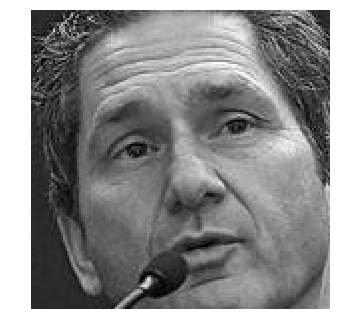

In [71]:
i = 2000

prediction = model.predict(X_test[i].reshape((1,1,150,150)))

print('Predicted age : {0} Truth : {1}'.format(prediction[0][0], age_test[i]))

plt.axis('off')
plt.imshow(X_test[i].reshape(150, 150), cmap='gray'); plt.show()



In [0]:
import pandas as pd

In [201]:
age_df = pd.Series(age)

len(age_df[age_df < 0])

0

In [0]:
age_model.save_weights('deep_face.h5')

In [51]:
!zip model.zip deep_face.h5

  adding: deep_face.h5 (deflated 8%)


In [0]:
from google.colab import auth
from googleapiclient.http import MediaFileUpload
from googleapiclient.discovery import build

auth.authenticate_user()

In [0]:
drive_service = build('drive', 'v3')

def save_file_to_drive(name, path):
    file_metadata = {
      'name': name,
      'mimeType': 'application/octet-stream'
    }
    
    media = MediaFileUpload(path, 
                    mimetype='application/octet-stream',
                    resumable=True)
    
    created = drive_service.files().create(body=file_metadata,
                                   media_body=media,
                                   fields='id').execute()
    print('File ID: {}'.format(created.get('id')))
    
    return created

In [56]:
save_file_to_drive('age_model', 'deep_face.h5')

File ID: 1XdMsUUZfGwbb-hbrpuQ297_8iiP__gzO


{'id': '1XdMsUUZfGwbb-hbrpuQ297_8iiP__gzO'}

In [0]:
lite = None
lite = Sequential()

In [0]:
from keras import backend as K
K.set_image_dim_ordering('th')

from keras.regularizers import l2, l1

In [0]:
lite.add(Conv2D(8, (3, 3), activation='relu', padding='same',
                 input_shape=(1, 128, 128)))

lite.add(MaxPooling2D(pool_size=(2, 2)))

lite.add(BatchNormalization())

lite.add(Conv2D(64, (3, 3), activation='relu', padding='same'))

lite.add(MaxPooling2D(pool_size=(2, 2)))

lite.add(BatchNormalization())

lite.add(Flatten())

In [0]:
age_lite = lite

In [0]:
age_lite.add(Dense(256, activation='relu',
             kernel_regularizer=l2(0.2)))

age_lite.add(Dropout(rate=0.2))

age_lite.add(Dense(128, activation='relu'))
#              kernel_regularizer=l2(0.5),
#              activity_regularizer=l1(0.3)))

# age_lite.add(Dropout(rate=0.2))

age_lite.add(Dense(1, activation='sigmoid'))

In [0]:
age_lite.compile(loss='categorical_crossentropy', optimizer='adam',
                  metrics=['accuracy'])

In [0]:
from keras.callbacks import TensorBoard

In [193]:
age_lite.fit(X_train, age_train, batch_size=32, epochs=25, 
          verbose=1, validation_data=(X_test, age_test), callbacks=[TensorBoard(log_dir='/tmp/autoencoder')])

ValueError: ignored

Predicted age : 19.41350746154785 Truth : 26


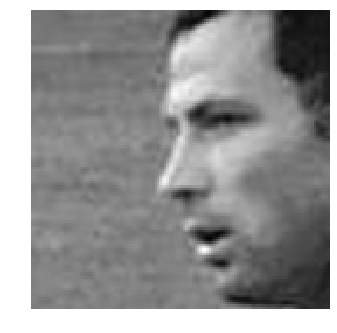

In [169]:
i = 456

prediction = age_lite.predict(X_test[i].reshape((1,1,128,128)))

print('Predicted age : {0} Truth : {1}'.format(prediction[0][0], age_test[i]))

plt.axis('off')
plt.imshow(X_test[i].reshape(128, 128), cmap='gray'); plt.show()

In [196]:
new_gender

[1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0